In [1]:
import numpy as np
import pandas as pd
import sys
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import Image
import time
import matplotlib 
import matplotlib.pyplot as plot

In [2]:
sys.path.append('/usr/local/Cellar/graph-tool/2.53/lib/python3.11/site-packages')

In [3]:
import graph_tool
from graph_tool.all import *

s = pd.read_csv("toy_example_s_matrix.csv")

In [4]:
s = pd.read_csv("whole_cell_s_matrix (1).csv")

In [5]:
stoich = s.values[:, 1:]
stoich[stoich != 0] = 1
cooc = stoich.dot(stoich.T)
cooc

array([[38, 36, 33, ..., 0, 0, 0],
       [36, 36, 31, ..., 0, 0, 0],
       [33, 31, 236, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 2, 1, 0],
       [0, 0, 1, ..., 1, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=object)

In [6]:
flow = pd.read_csv("whole_cell_flow_data.csv")

In [8]:
blacklist = set(["PROTON[c]", "ATP[C]", "ADP[C]", "MN+2[p]", "RXN0-16", "MN+2[c]", "ZN+2[c]", "RXN0-12", "ZN+2[p]",
                "TRANS-RXN-141B", "NI+2[c]", "NI+2[p]", "RXN0-16", "RXN0-12", "MG+2[p]", "TRANS-RXN-141", "MG+2[c]", 
                "CO+2[c]", "CO+2[p]"])

In [9]:
# Make edges
edges = []
vertexes = []
reactions = set({})
metabolites = set({})
for column in s:
    if column != "Unnamed: 0":
        if column in blacklist:
            continue
        vertexes.append(column)
        reactions.add(column)
    for i, item in s[column].items():
        if s["Unnamed: 0"][i] in blacklist:
            continue
        elif column == "Unnamed: 0":
            vertexes.append(s["Unnamed: 0"][i])
            metabolites.add(s["Unnamed: 0"][i])
        elif item < 0:
            edge = (s["Unnamed: 0"][i], column)
            edges.append(edge)
        elif item > 0:
            edge = (column, s["Unnamed: 0"][i])
            edges.append(edge)

In [10]:
vertex_dict = {name:i for i, name in enumerate(vertexes)}

In [11]:
for i, edge in enumerate(edges):
    if edge[0] in blacklist or edge[1] in blacklist:
        print(edge[0], edge[1])
    edges[i] = (vertex_dict[edge[0]], vertex_dict[edge[1]])

In [12]:
g = Graph()
g.add_edge_list(edges)
degrees = g.degree_property_map("out")

In [13]:
names = g.new_vertex_property("string")
colors = g.new_vertex_property("string")
shapes = g.new_vertex_property("string")

for i, name in enumerate(vertexes):
    names[g.vertex(i)] = name
    
    if name in reactions:
        shapes[g.vertex(i)] = "square"
        colors[g.vertex(i)] = "blue"
    elif name in metabolites:
        shapes[g.vertex(i)] = "circle"
        colors[g.vertex(i)] = "red"

g.vertex_properties["name"] = names
g.vertex_properties["shape"] = shapes
g.vertex_properties["color"] = colors

In [241]:
pos = graph_tool.draw.sfdp_layout(g)
graph_draw(g, pos=pos, vertex_text=g.vertex_properties["name"],
           vertex_shape=g.vertex_properties["shape"],
           vertex_fill_color=g.vertex_properties["color"],
           vertex_font_size=5, vertex_text_position=3.14,
           vertex_text_offset=[1.0,0], output="named_vertices.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x18963e610, at 0x189487190>

In [14]:
max_degree_vertices = sorted(range(g.num_vertices()), key=lambda i: degrees[i], reverse=True)[:100]

mask = np.ones(g.num_vertices())
mask[max_degree_vertices] = False
gf = graph_tool.GraphView(g, vfilt=mask)

In [15]:
pos = graph_tool.draw.sfdp_layout(gf)
graph_draw(gf, pos=pos, vertex_shape=g.vertex_properties["shape"],
           vertex_fill_color=g.vertex_properties["color"],
           vertex_font_size=5, vertex_text_position=3.14,
           vertex_text_offset=[1.0,0], output="named_vertices.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x168357350, at 0x16834f550>

In [244]:
s.values()

TypeError: 'numpy.ndarray' object is not callable

In [15]:
flow

,Unnamed: 0,data
0,1.5.1.20-RXN-5-METHYL-THF/NAD//METHYLENE-THF/N...,3851.0
1,1.5.1.20-RXN-CPD-1302/NAD//CPD-12996/NADH/PROT...,16095.0
2,1PFRUCTPHOSN-RXN,1238118.0
3,1TRANSKETO-RXN (reverse),7974.0
4,2-DEHYDROPANTOATE-REDUCT-RXN (reverse),1131.0
...,...,...
465,SERINE-O-ACETTRAN-RXN__CPLX0-237,17162.0
466,SERINE-O-ACETTRAN-RXN__CYSSYNMULTI-CPLX,16186.0
467,UNDECAPRENYL-DIPHOSPHATASE-RXN[CCO-CYTOSOL]-UN...,143.0
468,URPHOS-RXN__URPHOS-CPLX,3.0


In [16]:
g = Graph()

IntSlider(value=400, description='Width:', max=800, min=100, step=50)

IntSlider(value=300, description='Height:', max=600, min=100, step=50)

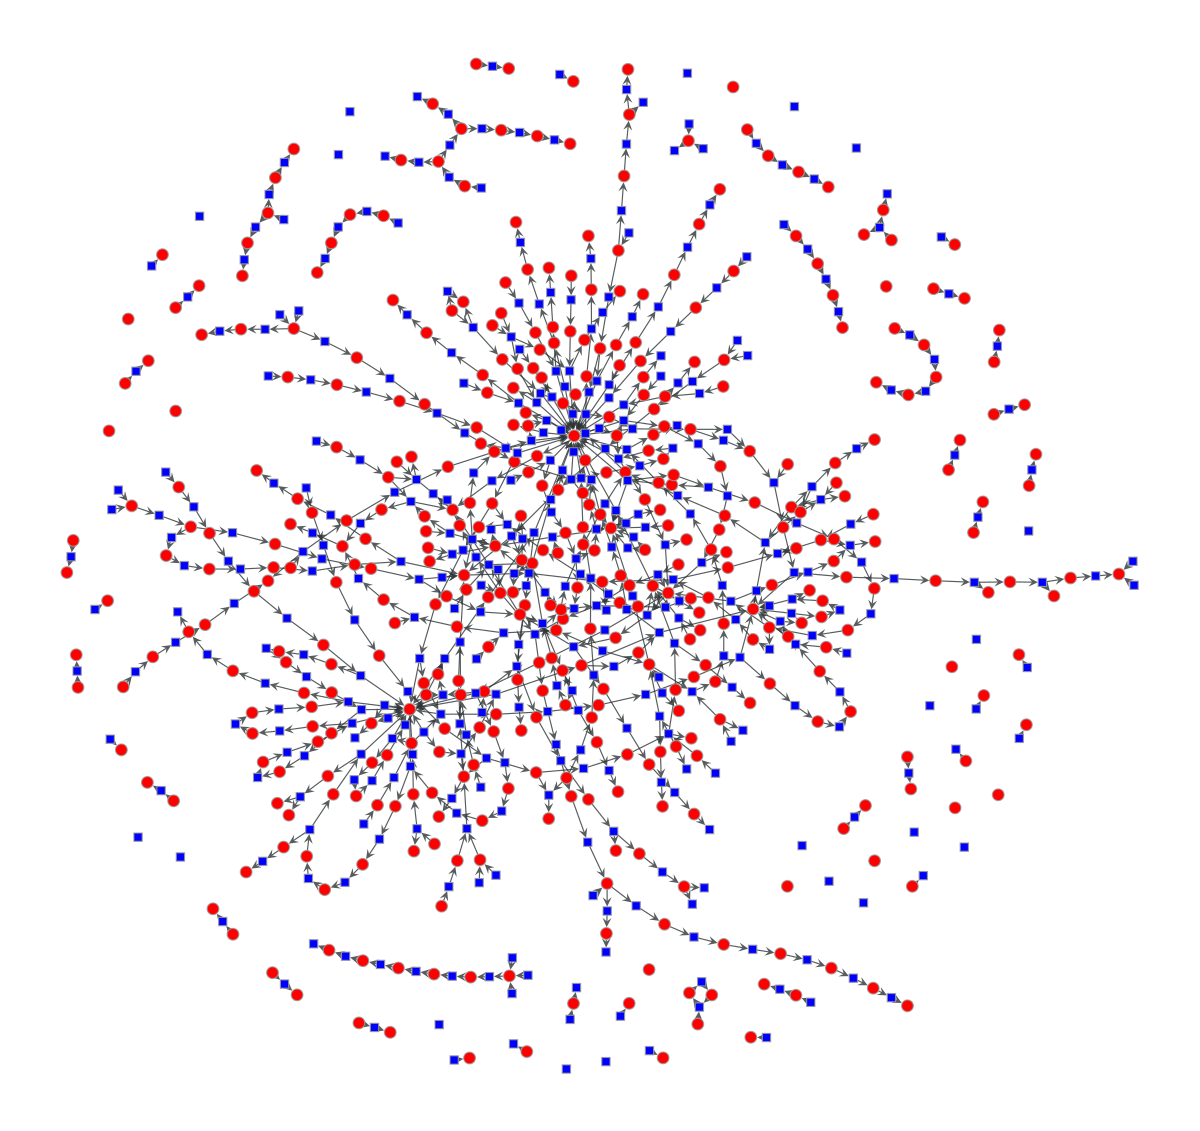

In [61]:
# Set initial values for width and height
initial_width = 400
initial_height = 300

# Create sliders for width and height
width_slider = widgets.IntSlider(value=initial_width, min=100, max=800, step=50, description='Width:')
height_slider = widgets.IntSlider(value=initial_height, min=100, max=600, step=50, description='Height:')

# Define the graph drawing function
def draw_graph(width, height):
    pos = graph_tool.draw.sfdp_layout(gf)
    graph_draw(gf, pos=pos, vertex_shape=g.vertex_properties["shape"],
               vertex_fill_color=g.vertex_properties["color"],
               vertex_font_size=5, vertex_text_position=3.14,
               vertex_text_offset=[1.0,0], output="test.png")
    display(Image(filename="test.png"))

# Define the callback function for slider changes
def handle_slider_change(change):
    width = width_slider.value
    height = height_slider.value
    time.sleep(1)
    clear_output(wait=True) 
    display(widgets.VBox([width_slider, height_slider]))
    draw_graph(width, height)

# Attach the callback function to the slider value change events
width_slider.observe(handle_slider_change, names='value')
height_slider.observe(handle_slider_change, names='value')

# Display the sliders
display(width_slider)
display(height_slider)

# Initial graph drawing
draw_graph(initial_width, initial_height)